In [ ]:
import cv2
import gdown
from matplotlib import pyplot
# Команда обеспечивает вывод графиков в Google Colaboratory
%matplotlib inline

In [ ]:
gdown.download('https://storage.yandexcloud.net/backplace/269411_v9_bd.jpg', None, quiet=True)

# Загрузка изображения
img = cv2.imread('./269411_v9_bd.jpg')
img2 = img.copy()
classifier = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_default.xml")
classifier_eye = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_eye.xml")

In [ ]:
face = classifier.detectMultiScale(img, scaleFactor=2, minNeighbors=3, minSize=(30, 30))

for (x, y, w, h) in face:
      center = (x + w // 2, y + h // 2)
      axes = (w // 2, h // 2)
      cv2.ellipse(img2, center, axes, 0, 0, 360, (0, 255, 0), 2)


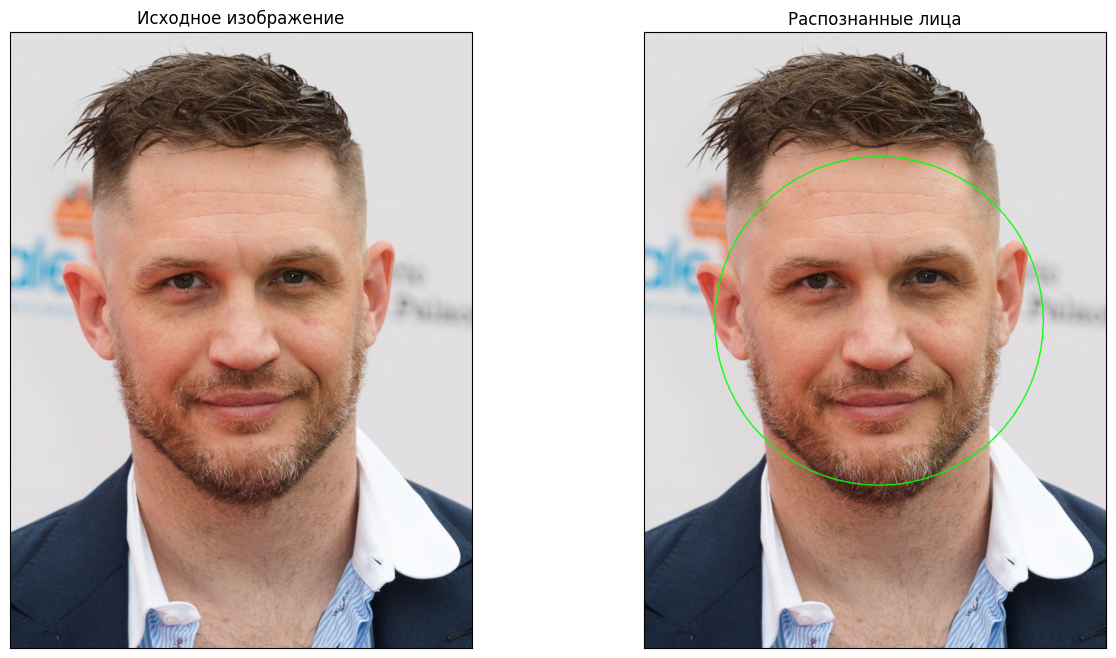

In [ ]:
fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Распознанные лица')

pyplot.show()

In [ ]:
face = img2[y:y + h, x:x + w]
eyes = classifier_eye.detectMultiScale(face)
for (x_eye,y_eye,w_eye,h_eye) in eyes:
  center = (int(x_eye + 0.5*w_eye), int(y_eye + 0.5*h_eye))
  radius = int(0.3 * (w_eye + h_eye))
  color = (0, 255, 0)
  thickness = 3
  cv2.circle(face, center, radius, (255, 0, 0), 2)


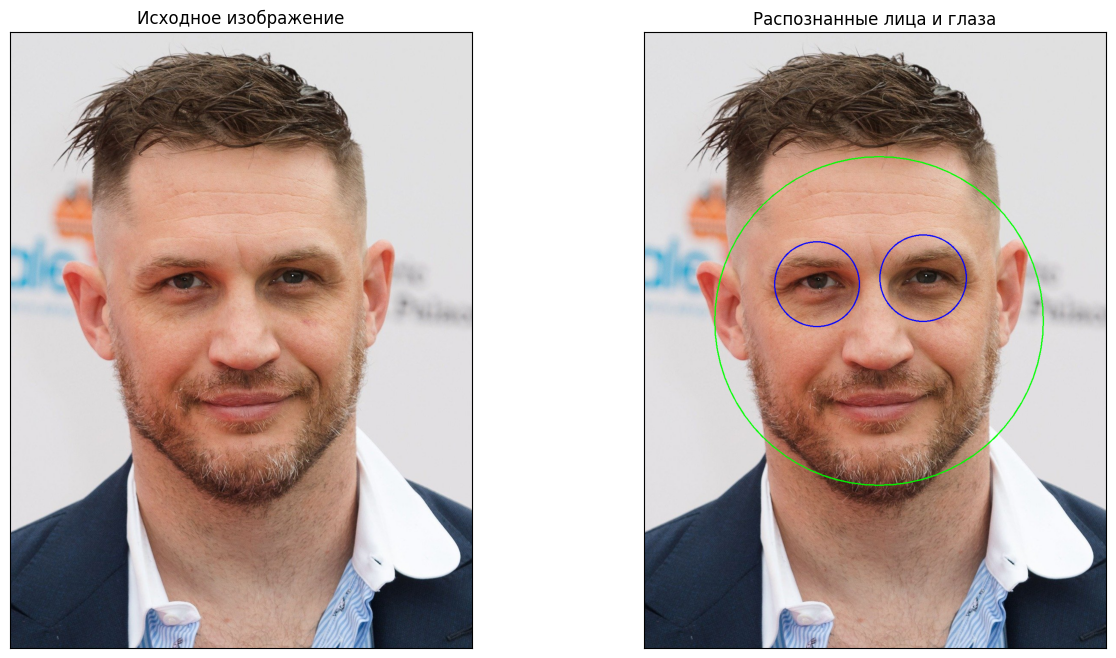

In [ ]:
fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Распознанные лица и глаза')

pyplot.show()


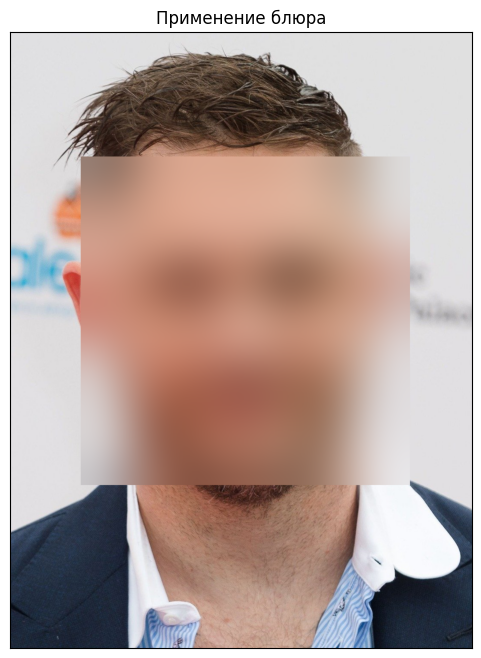

In [ ]:
face_region = img[y:y+h, x:x+w]

blurred_face = cv2.GaussianBlur(face_region, ((h // 2)|1, (w // 2)|1), 0)
img[y:y+h, x:x+w] = blurred_face
fig, (ax1) = pyplot.subplots(1, 1, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Применение блюра')
pyplot.show()

In [ ]:
from google.colab.patches import cv2_imshow

gdown.download('https://storage.yandexcloud.net/backplace/free-png.ru-174.png', None, quiet=True)
gdown.download('https://storage.yandexcloud.net/backplace/269411_v9_bd.jpg', None, quiet=True)

glass = cv2.imread('./free-png.ru-174.png', cv2.IMREAD_UNCHANGED)
img = cv2.imread('./269411_v9_bd.jpg')

face = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Преобразование изображения в оттенки серого
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face.detectMultiScale(img, 1.3, 5)
face = img[y:y + h, x:x + w]
eyes = classifier_eye.detectMultiScale(face)
print(eyes)
#так, судя по массиву нам нужны только первые два глаза на изображении

[[190 225 160 160]
 [443 225 144 144]
 [772 343  25  25]]


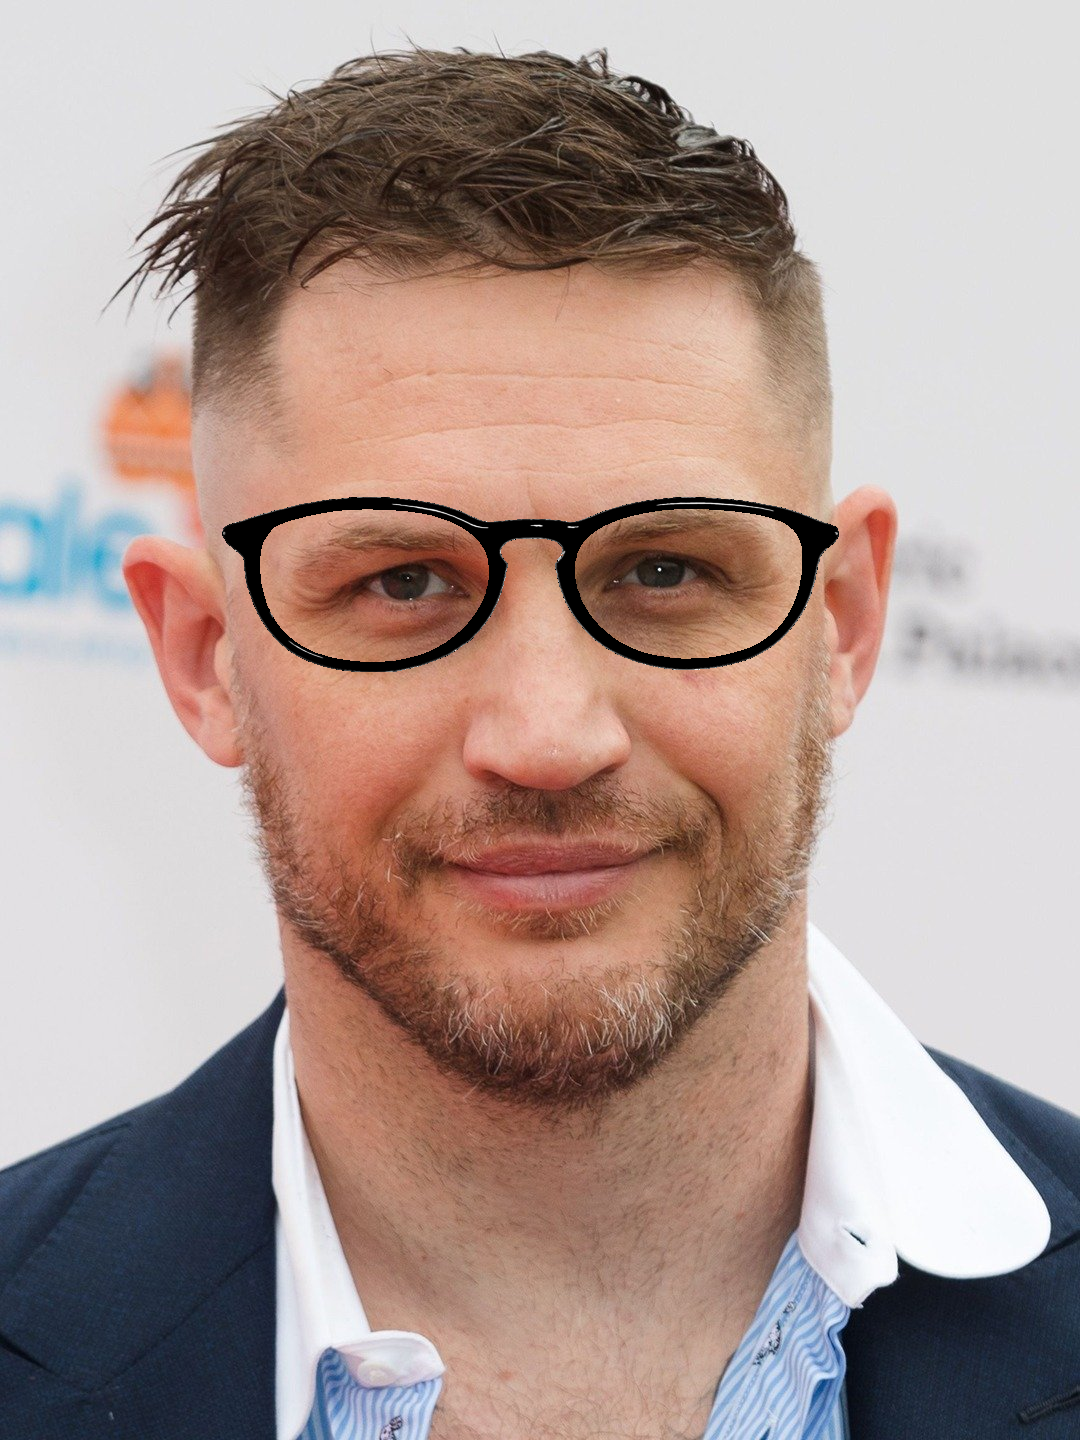

In [ ]:
for (x, y, w, h) in faces:
    # область интереса
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

    eyes = eye.detectMultiScale(roi_gray)
    if len(eyes) >= 2:
        eye1 = eyes[0]
        eye2 = eyes[1]

        # получаем параметры для глаз
        ex1, ey1, ew1, eh1 = eye1
        ex2, ey2, ew2, eh2 = eye2

        # вычисляем центр между ними
        center_x = (ex1 + ex2 + ew1) // 2
        center_y = (ey1 + ey2 + eh1) // 2

        # меняем размер очков
        scale_factor = (ex2 + ew2 - ex1) / glass.shape[1]
        new_glass_width = int(glass.shape[1] * scale_factor * 2.2)
        new_glass_height = int(glass.shape[0] * scale_factor * 1.6)
        resized_glass = cv2.resize(glass, (new_glass_width, new_glass_height))

        # определяем область для наложения
        x_offset = center_x - new_glass_width // 2
        y_offset = center_y - new_glass_height // 2

        # наложение
        for i in range(new_glass_height):
            for j in range(new_glass_width):
                if resized_glass[i, j, 3] != 0:
                    roi_color[y_offset + i, x_offset + j] = resized_glass[i, j][:3]

cv2.imwrite('res.png', img)
cv2_imshow(img)